In [76]:
import arviz as az
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.integrate as integrate

In [77]:
#https://cp.copernicus.org/articles/17/1065/2021/cp-17-1065-2021-supplement.pdf
pmip=pd.read_csv("PMIP.dat",delim_whitespace=True)

# Read in forcing and temperature data for meta-analysis

In [78]:
#sheet_id="1EjugdAQ4ACrN_oJPsOWDWr0tf4mNZTRcTuejAwivTx8"
sheet_id="12YTvG8ZWhPKWoA3JRUh0v-TdvkJb3XxBz1TVr7A3W2A"
sheet_name = "Temperature"
url_t = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
LGM_temperature=pd.read_csv(url_t)

sheet_name = "Forcing"
url_f = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
LGM_forcing=pd.read_csv(url_f)

In [79]:
url_t

'https://docs.google.com/spreadsheets/d/12YTvG8ZWhPKWoA3JRUh0v-TdvkJb3XxBz1TVr7A3W2A/gviz/tq?tqx=out:csv&sheet=Temperature'

In [80]:
LGM_forcing

,Quantity,Mean,Sigma,Reference,Model,Other,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,Rice,-3.79,NaN,https://royalsocietypublishing.org/doi/full/10...,CCSM4,PMIP3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rice,-4.90,NaN,https://royalsocietypublishing.org/doi/full/10...,IPSL-CM5A-LR,PMIP3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rice,-5.20,NaN,https://royalsocietypublishing.org/doi/full/10...,MIROC-ESM,PMIP3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rice,-4.57,NaN,https://royalsocietypublishing.org/doi/full/10...,MPI-ESM-P,PMIP3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rice,-3.62,NaN,https://royalsocietypublishing.org/doi/full/10...,MRI-CGCM3,PMIP3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Rice,-2.59,NaN,https://www.nature.com/articles/nclimate1456,CCSM3,PMIP4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Rice,-2.66,NaN,https://www.nature.com/articles/nclimate1456,CMRM,PMIP4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Rice,-3.23,NaN,https://www.nature.com/articles/nclimate1456,HadCM3M2,PMIP4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Rice,-3.41,NaN,https://www.nature.com/articles/nclimate1456,HadCM3M2 v,PMIP4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Rice,-3.48,NaN,https://www.nature.com/articles/nclimate1456,IPSL-CM4,PMIP4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
url_f

'https://docs.google.com/spreadsheets/d/12YTvG8ZWhPKWoA3JRUh0v-TdvkJb3XxBz1TVr7A3W2A/gviz/tq?tqx=out:csv&sheet=Forcing'

In [82]:
#make latex table
Trefs={}
Trefs["https://cp.copernicus.org/articles/9/367/2013/"]="\cite{annan2013new}"
Trefs[LGM_temperature["Reference"][1]]="\cite{Schneider_von_Deimling_2006}"
Trefs[LGM_temperature["Reference"][2]]="\cite{Holden_2009}"
Trefs[LGM_temperature["Reference"][3]]="\cite{Shakun_2012}"
Trefs[LGM_temperature["Reference"][4]]="\cite{Snyder_2016}"
Trefs[LGM_temperature["Reference"][5]]="\cite{Bereiter_2018}"
Trefs[LGM_temperature["Reference"][6]]="\cite{FRIEDRICH2020115911}"
Trefs[LGM_temperature["Reference"][7]]="\cite{friedrich2016nonlinear}"
Trefs[LGM_temperature["Reference"][8]]="\cite{tierney2020glacial}"
Trefs[LGM_temperature["Reference"][9]]="\cite{sherwood2020assessment}"
Trefs['https://cp.copernicus.org/articles/17/1065/2021/cp-17-1065-2021-supplement.pdf']="\cite{Kageyama_2021}"

In [83]:
newT={}
newT["Mean"]=LGM_temperature["Mean"]
newT["Standard Deviation"]=LGM_temperature["Sigma"]
newT["Reference"]=[Trefs[ref] for ref in LGM_temperature["Reference"]]
newT["Derived From"] = LGM_temperature["Model"]
newT["Generation"]=LGM_temperature["Other"]
newTdf=pd.DataFrame(newT)
print(newTdf.style.hide(axis="index").format(decimal='.', thousands='.', precision=2).to_latex())

\begin{tabular}{rrlll}
Mean & Standard Deviation & Reference & Derived From & Generation \\
-4.00 & 0.41 & \cite{annan2013new} & Proxies and models & nan \\
-5.80 & 0.77 & \cite{Schneider_von_Deimling_2006} & Proxies and models & nan \\
-6.20 & 0.46 & \cite{Holden_2009} & GENIE-1 & nan \\
-3.58 & 0.12 & \cite{Shakun_2012} & Proxies & nan \\
-6.20 & 0.92 & \cite{Snyder_2016} & Proxies and models & nan \\
-6.30 & 0.61 & \cite{Bereiter_2018} & Proxies (ocean temperature) and models & nan \\
-5.70 & 0.20 & \cite{FRIEDRICH2020115911} & nan & nan \\
-5.75 & 0.38 & \cite{friedrich2016nonlinear} & nan & nan \\
-6.10 & 0.20 & \cite{tierney2020glacial} & nan & nan \\
-5.00 & 1.00 & \cite{sherwood2020assessment} & nan & nan \\
-4.85 & nan & \cite{Kageyama_2021} & CESM & PMIP3 \\
-2.70 & nan & \cite{Kageyama_2021} & CNRM & PMIP3 \\
-4.63 & nan & \cite{Kageyama_2021} & FGOALS-g2 & PMIP3 \\
-4.92 & nan & \cite{Kageyama_2021} & GISSE2-p1 & PMIP3 \\
-5.19 & nan & \cite{Kageyama_2021} & GISSE2-p2 & PMI

In [84]:
cols=LGM_temperature.columns.tolist()
print(LGM_temperature[cols[1:]].style.hide(axis="index").format(decimal='.', thousands='.', precision=2).to_latex())

\begin{tabular}{rrlll}
Mean & Sigma & Reference & Model & Other \\
-4.00 & 0.41 & https://cp.copernicus.org/articles/9/367/2013/ & Proxies and models & nan \\
-5.80 & 0.77 & https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2006GL026484 & Proxies and models & nan \\
-6.20 & 0.46 & https://link.springer.com/article/10.1007/s00382-009-0630-8 & GENIE-1 & nan \\
-3.58 & 0.12 & https://www.nature.com/articles/nature10915 & Proxies & nan \\
-6.20 & 0.92 & https://www.nature.com/articles/nature19798#Ack1 & Proxies and models & nan \\
-6.30 & 0.61 & https://www.nature.com/articles/nature25152?sf178574246=1 & Proxies (ocean temperature) and models & nan \\
-5.70 & 0.20 & https://www.sciencedirect.com/science/article/pii/S0012821X1930603X?casa_token=qhLV5huk4GcAAAAA:Mtx7kwmI0pTezohDr4kGUB-FguhK6-6Eg8hyevKlMurjhkW7ERf99__9aL6DqfK821YxHo8B#br0130 & nan & nan \\
-5.75 & 0.38 & https://www.science.org/doi/full/10.1126/sciadv.1501923 & nan & nan \\
-6.10 & 0.20 & https://www.nature.com/article

In [85]:
cols=LGM_forcing.columns.tolist()
print(LGM_forcing.style.hide(axis="index").format(decimal='.', thousands='.', precision=2).to_latex())

\begin{tabular}{lrrlllrrrrrrlrrlllrrrrrrrrrrrrrrrrrrrr}
Quantity & Mean & Sigma & Reference & Model & Other & Unnamed: 6 & Unnamed: 7 & Unnamed: 8 & Unnamed: 9 & Unnamed: 10 & Unnamed: 11 & Quantity.1 & Mean.1 & Sigma.1 & Reference.1 & Model.1 & Other.1 & Unnamed: 18 & Unnamed: 19 & Unnamed: 20 & Unnamed: 21 & Unnamed: 22 & Unnamed: 23 & Unnamed: 24 & Unnamed: 25 & Unnamed: 26 & Unnamed: 27 & Unnamed: 28 & Unnamed: 29 & Unnamed: 30 & Unnamed: 31 & Unnamed: 32 & Unnamed: 33 & Unnamed: 34 & Unnamed: 35 & Unnamed: 36 & Unnamed: 37 \\
Rice & -3.79 & nan & https://royalsocietypublishing.org/doi/full/10.1098/rsta.2014.0424 & CCSM4 & PMIP3 & nan & nan & nan & nan & nan & nan & Rice & -3.79 & nan & https://royalsocietypublishing.org/doi/full/10.1098/rsta.2014.0424 & CCSM4 & PMIP3 & nan & nan & nan & nan & nan & nan & nan & nan & nan & nan & nan & nan & nan & nan & nan & nan & nan & nan & nan & nan \\
Rice & -4.90 & nan & https://royalsocietypublishing.org/doi/full/10.1098/rsta.2014.0425 & IPSL

In [86]:
#Studies with reported standard deviations
y=LGM_temperature[(LGM_temperature.Other!="PMIP4") & (LGM_temperature.Other!="PMIP3")].Mean.values
s=LGM_temperature[(LGM_temperature.Other!="PMIP4") & (LGM_temperature.Other!="PMIP3")].Sigma.values

#PMIP model values: tr
pmip4=LGM_temperature[(LGM_temperature.Other=="PMIP4")].Mean.values
y=np.append(y,np.average(pmip4))
s=np.append(s,np.std(pmip4))

pmip3=LGM_temperature[(LGM_temperature.Other=="PMIP3")].Mean.values
y=np.append(y,np.average(pmip3))
s=np.append(s,np.std(pmip3))

In [87]:
with pm.Model() as tierneyprior:
    #priors on latent underlying mean and inter-study spread (random effects model, tau=0 for fixed effects)
    μ=pm.Normal("μ",-6.1,sigma=0.2)
    #τ=pm.InverseGamma("τ",1,0.15)
    τ=pm.Uniform("τ",0,100)
    θ=pm.Normal('θ',μ,sigma=τ,shape=len(y))
    obs=pm.Normal("obs",θ,sigma=s,observed=y)
    
with pm.Model() as tierneyprior_fixed:
    #priors on latent underlying mean and inter-study spread (random effects model, tau=0 for fixed effects)
    μ=pm.Normal("μ",-6.1,sigma=0.2)
    #τ=pm.InverseGamma("τ",1,0.15)
   # τ=pm.Uniform("τ",0,100)
   # θ=pm.Normal('θ',μ,sigma=τ,shape=len(y))
    obs=pm.Normal("obs",μ,sigma=s,observed=y)
    
with pm.Model() as broadprior:
    #priors on latent underlying mean and inter-study spread (random effects model, tau=0 for fixed effects)
    μ=pm.Normal("μ",0,sigma=100)
    #τ=pm.InverseGamma("τ",1,0.15)
    τ=pm.Uniform("τ",0,100)
    θ=pm.Normal('θ',μ,sigma=τ,shape=len(y))
    obs=pm.Normal("obs",θ,sigma=s,observed=y)
    
    
with pm.Model() as broadprior_fixed:
    #priors on latent underlying mean and inter-study spread (random effects model, tau=0 for fixed effects)
    μ=pm.Normal("μ",0,sigma=100)
    #τ=pm.InverseGamma("τ",1,0.15)
   # τ=pm.Uniform("τ",0,100)
   # θ=pm.Normal('θ',μ,sigma=τ,shape=len(y))
    obs=pm.Normal("obs",μ,sigma=s,observed=y)    

In [88]:
with tierneyprior:
    tierneytrace=pm.sample(return_inferencedata=True)
with tierneyprior_fixed:
    tierney_fixed_trace=pm.sample(return_inferencedata=True)
with broadprior:
    broadtrace=pm.sample(return_inferencedata=True)
with broadprior_fixed:
    broadtrace_fixed=pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, τ, θ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, τ, θ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


<Axes: title={'center': 'μ'}>

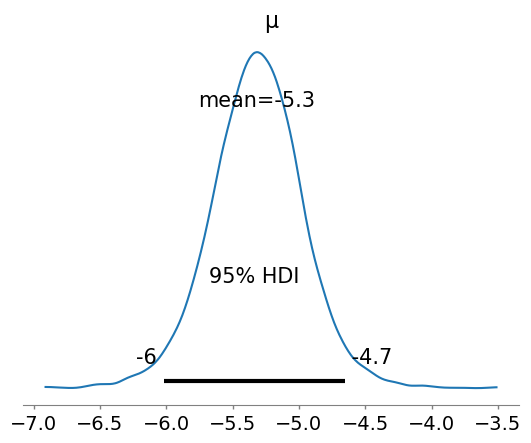

In [98]:
az.plot_posterior(broadtrace.posterior.μ,hdi_prob=.95)

<Axes: title={'center': 'μ'}, ylabel='Density'>

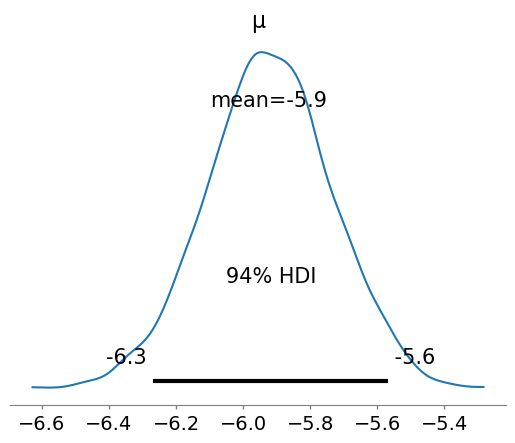

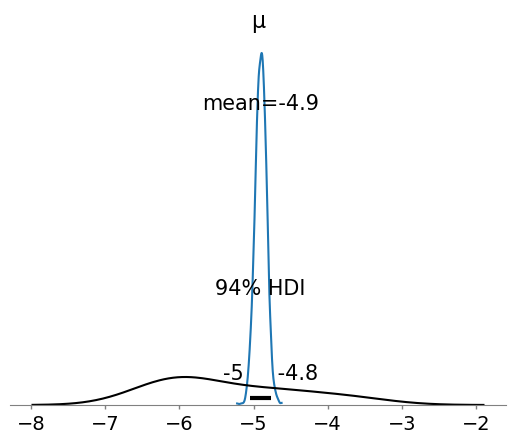

In [22]:
#If our priors are EXACTLY the tierney estimates and we believe there to be substantial random spread among studies, we don't really budge
az.plot_posterior(tierneytrace.posterior.μ)
#If our priors are the Tierney estimates and we believe all studies to be measuring the same thing, T20 is just an outlier
az.plot_posterior(tierney_fixed_trace.posterior.μ)
#sns.kdeplot(np.random.normal(-5,1,100000),c="r")
sns.kdeplot(y,c="k")

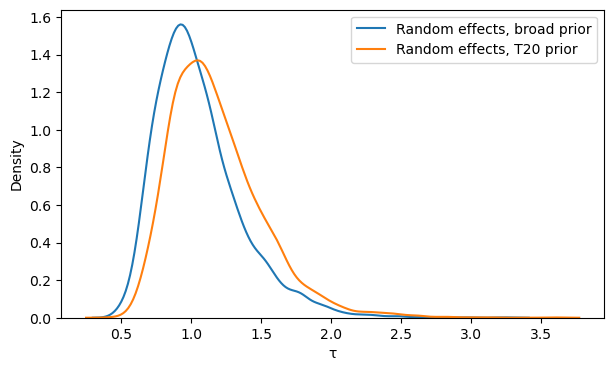

In [23]:
#Meta analysis of temperature
plt.figure(figsize=(7,4))
sns.kdeplot(broadtrace.posterior.τ.values.flatten(),label="Random effects, broad prior")
#sns.kdeplot(broadtrace_fixed.posterior.μ.values.flatten(),label="Fixed effect, broad prior")
sns.kdeplot(tierneytrace.posterior.τ.values.flatten(),label="Random effects, T20 prior")
#sns.kdeplot(tierney_fixed_trace.posterior.μ.values.flatten(),label="Fixed effect, T20 prior")
#sns.kdeplot(y,c="k",label="Raw temperature estimates")
plt.xlabel("τ")
plt.legend()

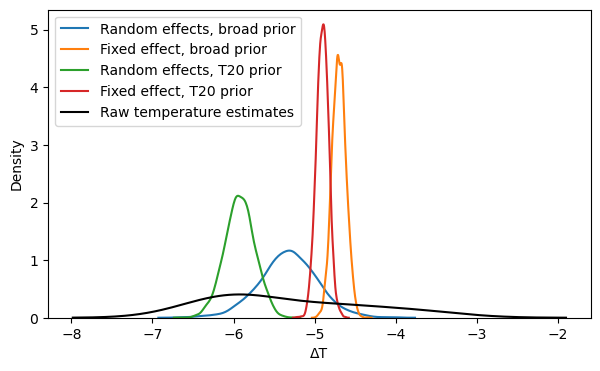

In [24]:
#Meta analysis of temperature
plt.figure(figsize=(7,4))
sns.kdeplot(broadtrace.posterior.μ.values.flatten(),label="Random effects, broad prior")
sns.kdeplot(broadtrace_fixed.posterior.μ.values.flatten(),label="Fixed effect, broad prior")
sns.kdeplot(tierneytrace.posterior.μ.values.flatten(),label="Random effects, T20 prior")
sns.kdeplot(tierney_fixed_trace.posterior.μ.values.flatten(),label="Fixed effect, T20 prior")
sns.kdeplot(y,c="k",label="Raw temperature estimates")
plt.xlabel("ΔT")
plt.legend()
#plt.savefig("FIGS/meta.png")

(-7.0, -3.5)

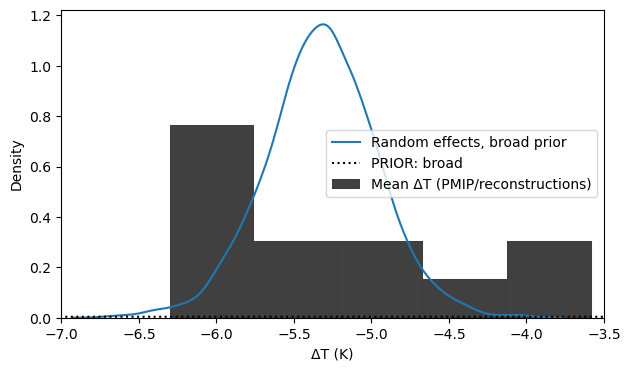

In [58]:
#Meta analysis of temperature
plt.figure(figsize=(7,4))
sns.kdeplot(broadtrace.posterior.μ.values.flatten(),label="Random effects, broad prior")
# sns.kdeplot(broadtrace_fixed.posterior.μ.values.flatten(),label="Fixed effect, broad prior")
#sns.kdeplot(tierneytrace.posterior.μ.values.flatten(),label="Random effects, T20 prior")
#sns.kdeplot(tierney_fixed_trace.posterior.μ.values.flatten(),label="Fixed effect, T20 prior")
sns.kdeplot(np.random.normal(0,100,10000),color="k",ls=":",label="PRIOR: broad")
#sns.kdeplot(y,c="k",label="Raw temperature estimates")
sns.histplot(y,color="k",label="Mean ΔT (PMIP/reconstructions)",stat="density")
plt.xlabel("ΔT (K)")
plt.legend()
plt.xlim(-7,-3.5)
#plt.savefig("FIGS/meta.png")

In [38]:
y

array([-4.        , -5.8       , -6.2       , -3.58      , -6.2       ,
       -6.3       , -5.7       , -5.75      , -6.1       , -5.        ,
       -4.76846154, -4.612     ])

In [21]:
#Highest posterior density intervals
az.hdi(tierneytrace.posterior.μ,hdi_prob=.90).μ.values

array([-6.22992272, -5.6255316 ])

# Ice forcing estimates
It matters whether we use a fixed or random effect model!  If we assume fixed effect, then the "true" mean and uncertainty is small, since all the results are assumed to come from the same underlying distrbution.

It also matters how we pool the estimates, since PMIP3 results are systematically more negative than PMIP4

In [22]:
pmip3_rice=LGM_forcing[(LGM_forcing.Other=="PMIP3") &(LGM_forcing.Quantity=="Rice") ].Mean.values
pmip4_rice=LGM_forcing[(LGM_forcing.Other=="PMIP4") &(LGM_forcing.Quantity=="Rice") ].Mean.values

dust_estimates=LGM_forcing[LGM_forcing.Quantity=="Rdust"].Mean.values
insolation_estimates=LGM_forcing[LGM_forcing.Quantity=="Rinsolation"].Mean.values
ghg_estimates=LGM_forcing[LGM_forcing.Quantity=="Rghg"].Mean.values
ice_estimates=np.append(pmip3_rice,pmip4_rice)

In [40]:
yi=ice_estimates
si=np.append(np.tile(np.std(pmip3_rice),len(pmip3_rice)),np.tile(np.std(pmip4_rice),len(pmip4_rice)))

In [74]:
with pm.Model() as ice_broadprior:
    μ_ice = pm.Normal("μ_ice",0,100)
    τ_ice=pm.Uniform("τ_ice",0,100)
    θ_ice=pm.Normal('θ_ice',μ_ice,sigma=τ_ice,shape=len(ice_estimates))

    obs_ice = pm.Normal('F_ice', mu=θ_ice, sigma=si, observed=ice_estimates)
    icetrace=pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ_ice, τ_ice, θ_ice]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


In [83]:

with pm.Model() as dustbroadprior:
    μ_dust = pm.Normal("μ_dust",0,100)
    τ_dust=pm.Uniform("τ_dust",0,100)
    θ_dust=pm.Normal('θ_dust',μ_dust,sigma=τ_dust,shape=len(dust_estimates))

    obs_dust = pm.Normal('F_dust', mu=θ_dust, sigma=np.zeros_like(dust_estimates)+.001, observed=dust_estimates)
    dusttrace=pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ_dust, τ_dust, θ_dust]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [ ]:
icetrace.

In [81]:
icetrace.posterior.μ_ice.std()

<xarray.DataArray 'μ_ice' ()>
array(0.25425376)

In [82]:
icetrace_zerosigma.posterior.μ_ice.std()

<xarray.DataArray 'μ_ice' ()>
array(0.26049021)

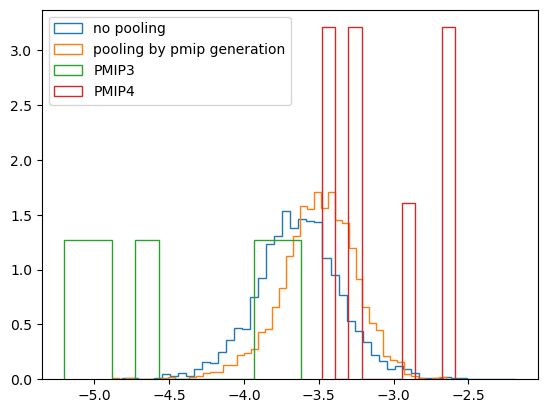

In [73]:
tmp=plt.hist(icetrace_zerosigma.posterior.μ_ice.values.flatten(),50,histtype="step",density=True,label="no pooling")
tmp=plt.hist(icetrace.posterior.μ_ice.values.flatten(),50,histtype="step",density=True,label="pooling by pmip generation")
tmp=plt.hist(pmip3_rice,histtype="step",density=True,label="PMIP3")
tmp=plt.hist(pmip4_rice,histtype="step",density=True,label="PMIP4")
plt.legend()

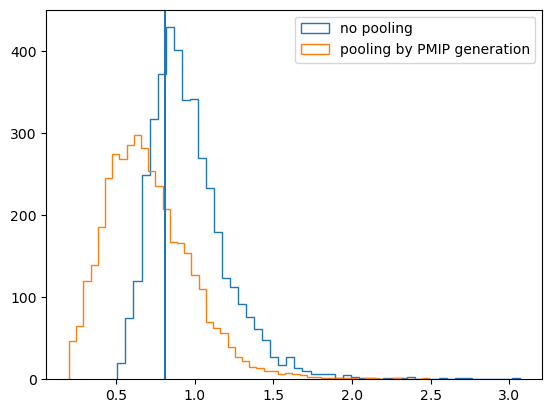

In [70]:
tmp=plt.hist(icetrace_zerosigma.posterior.τ_ice.values.flatten(),50,histtype="step",label="no pooling")
tmp=plt.hist(icetrace.posterior.τ_ice.values.flatten(),50,histtype="step",label="pooling by PMIP generation")
plt.axvline(np.std(ice_estimates))
plt.legend()

In [78]:
az.hdi(icetrace_zerosigma.posterior.μ_ice,hdi_prob=.95)

<xarray.Dataset>
Dimensions:  (hdi: 2)
Coordinates:
  * hdi      (hdi) <U6 'lower' 'higher'
Data variables:
    μ_ice    (hdi) float64 -4.05 -3.036

array([<Axes: title={'center': 'μ_ice'}>,
       <Axes: title={'center': 'τ_ice'}>], dtype=object)

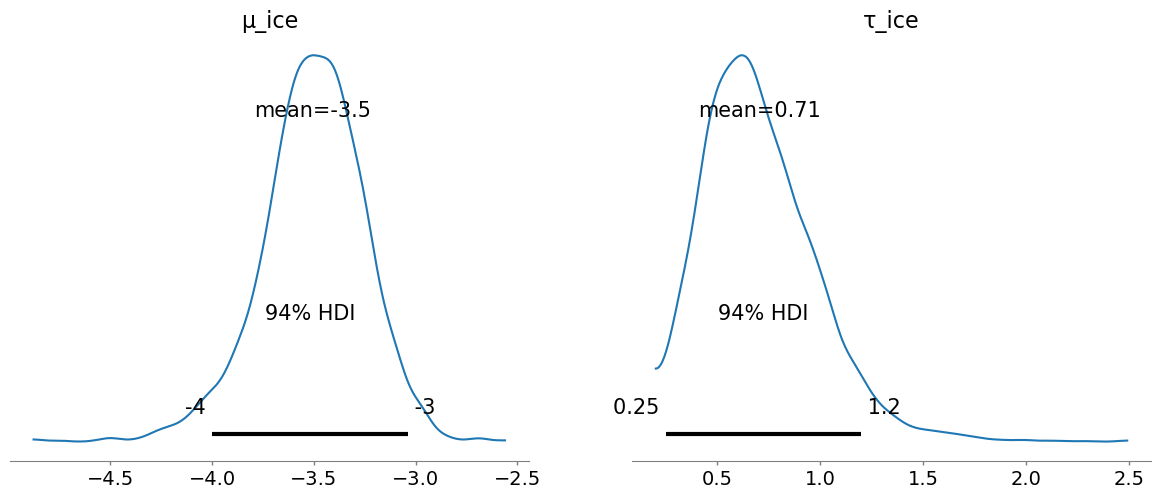

In [44]:
az.plot_posterior(icetrace,var_names=["μ_ice","τ_ice"])

<Axes: title={'center': 'μ_ice'}>

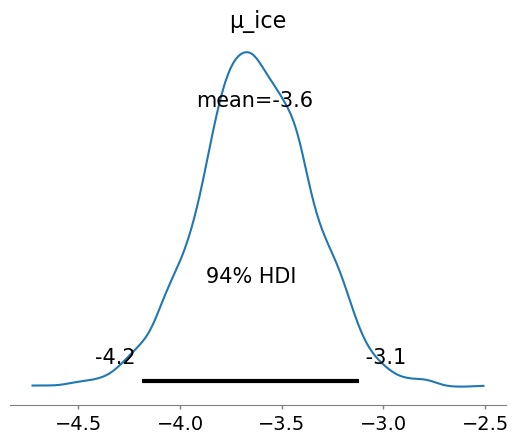

In [35]:
az.plot_posterior(icetrace,var_names=["μ_ice"])

In [122]:
with pm.Model() as nonGHGforcings_broadprior:
    μ_ice = pm.Normal("μ_ice",0,100)
    τ_ice=pm.Uniform("τ_ice",0,10)
    θ_ice=pm.Normal('θ_ice',μ_ice,sigma=τ_ice)
    σ_ice=np.std(ice_estimates)
    obs_ice = pm.Normal('F_ice', mu=θ_ice, sigma=σ_ice, observed=ice_estimates)
    
    μ_dust = pm.Normal("μ_dust",0,100)
    τdust=pm.Uniform("τ_dust",0,10)
    θ_dust=pm.Normal('θ_dust',μ_dust,sigma=τdust)
    σ_dust=np.std(dust_estimates)
    obs_dust = pm.Normal('F_dust', mu=θ_dust, sigma=σ_dust, observed=dust_estimates)
    
    μ_insolation = pm.Normal("μ_insolation",0,100)
    τinsolation=pm.Uniform("τ_insolation",0,10)
    θ_insolation=pm.Normal('θ_insolation',μ_insolation,sigma=τinsolation)
    σ_insolation=np.std(insolation_estimates)
    obs_insolation = pm.Normal('F_insolation', mu=θ_insolation, sigma=σ_insolation, observed=insolation_estimates)
    total=pm.Deterministic("F_nonGHG",μ_dust+μ_ice+μ_insolation)
        
#     μ_GHG = pm.Normal("μ_GHG",0,10)
#     σ_GHG = pm.HalfNormal('σ_GHG', sigma=10)
#     F_GHG = pm.Normal('F_GHG', mu=μ, sigma=σ, observed=GHG_estimates)
    
    
with nonGHGforcings_broadprior:
    nonGHGforcings_broadprior_trace=pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ_ice, τ_ice, θ_ice, μ_dust, τ_dust, θ_dust, μ_insolation, τ_insolation, θ_insolation]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 421 divergences after tuning. Increase `target_accept` or reparameterize.


<Axes: title={'center': 'μ_ice'}>

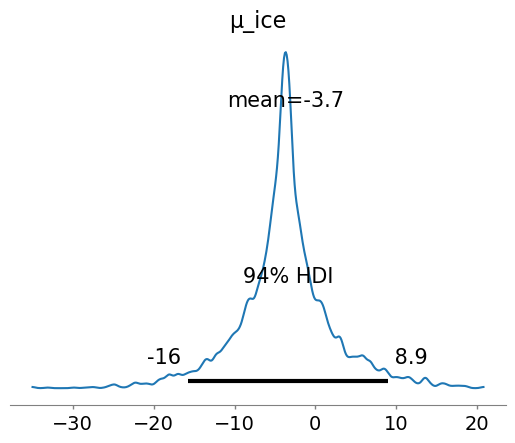

In [123]:
az.plot_posterior(nonGHGforcings_broadprior_trace.posterior.μ_ice)

In [93]:
with pm.Model() as nonGHGforcings:
    μ_ice = pm.Normal("μ_ice",0,10)
    σ_ice = pm.HalfNormal('σ_ice', sigma=10)
    F_ice = pm.Normal('F_ice', mu=μ_ice, sigma=σ_ice, observed=ice_estimates)
    
    μ_dust = pm.Normal("μ_dust",0,10)
    σ_dust = pm.HalfNormal('σ_dust', sigma=10)
    F_dust = pm.Normal('F_dust', mu=μ_dust, sigma=σ_dust, observed=dust_estimates)
    
    μ_insolation = pm.Normal("μ_insolation",0,10)
    σ_insolation = pm.HalfNormal('σ_insolation', sigma=10)
    F_insolation = pm.Normal('F_insolation', mu=μ_insolation, sigma=σ_insolation, observed=insolation_estimates)
    
    total=μ_dust+μ_ice+μ_insolation
        
#     μ_GHG = pm.Normal("μ_GHG",0,10)
#     σ_GHG = pm.HalfNormal('σ_GHG', sigma=10)
#     F_GHG = pm.Normal('F_GHG', mu=μ, sigma=σ, observed=GHG_estimates)
    
    
with nonGHGforcings:
    testtrace=pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ_ice, σ_ice, μ_dust, σ_dust, μ_insolation, σ_insolation]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


array([<Axes: title={'center': 'μ_ice'}>,
       <Axes: title={'center': 'μ_dust'}>,
       <Axes: title={'center': 'μ_insolation'}>], dtype=object)

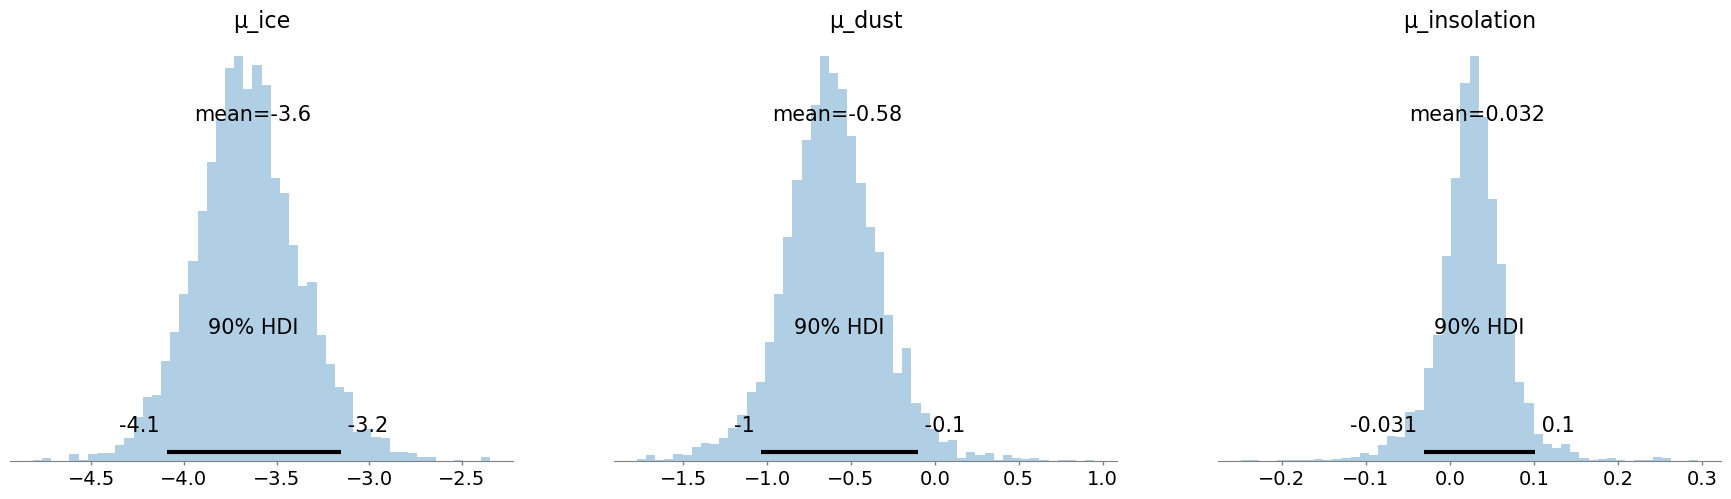

In [94]:
az.plot_posterior(testtrace.posterior,\
                  var_names=["μ_ice","μ_dust","μ_insolation"],\
                  kind="hist",\
                 hdi_prob=.9,bins=50)

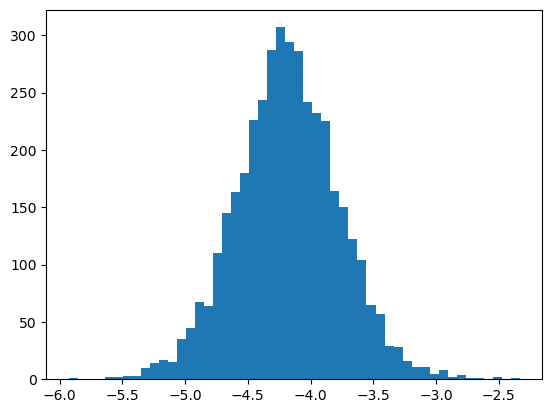

In [95]:
non_GHG_forcings_posterior=(testtrace.posterior.μ_ice+testtrace.posterior.μ_insolation+testtrace.posterior.μ_dust).values.flatten()
tmp=plt.hist(non_GHG_forcings_posterior,50)


In [96]:
az.hdi(non_GHG_forcings_posterior,hdi_prob=.9)

array([-4.89430614, -3.55218764])

In [97]:
#from S20
vegetation_forcing=np.random.normal(-1.1,0.6/1.64,len(non_GHG_forcings_posterior))
GHG_forcing=np.random.normal(-2.27+-0.57 +-0.28,0.26,len(non_GHG_forcings_posterior))
LGM_forcing=non_GHG_forcings_posterior+GHG_forcing+vegetation_forcing
muF_meta=np.average(LGM_forcing)
sigF_meta=np.std(LGM_forcing)

In [98]:
muF_meta

-8.416940585618116

In [99]:
sigF_meta

0.619373501183552

In [100]:
muT_meta=np.average(broadtrace.posterior.μ)
sigT_meta=np.std(broadtrace.posterior.μ.values.flatten())


In [101]:
def PT(T):
    
    muT= muT_meta
    sigT=sigT_meta
    
    return np.exp(-0.5*(T-muT)**2/sigT**2)*1/(np.sqrt(2*np.pi)*sigT)
def PF(F,use_s20=False):
    if not use_s20:
        muF=muF_meta
        sigF=sigF_meta
    else:
        muF=-8.43
        sigF=2.
    

    #muT=-5.
    #sigT=1.
    return np.exp(-0.5*(F-muF)**2/sigF**2)*1/(np.sqrt(2*np.pi)*sigF)
  

In [102]:
lams=np.linspace(-5,5,1000)
alphas=np.linspace(-1,1,500)
lamshape=len(lams)
alphashape=len(alphas)

In [103]:
def LGM_likelihood_meta(lam,alpha,use_s20=False):
    
    #integrand=lambda x: PF(2*alpha*x**2- lam*x)*PT(x,tempfrom=tempfrom)* np.sqrt(1+(4*alpha*x-lam)**2)
    integrand=lambda x: PF(-alpha/2.*x**2- lam*x,use_s20=use_s20)*PT(x)* np.sqrt(1+(-alpha*x+-lam)**2)

    return integrate.quad(integrand,-np.inf,np.inf)[0]

In [104]:

LGM0=np.array([LGM_likelihood_meta(x,0,use_s20=True) for x in lams])


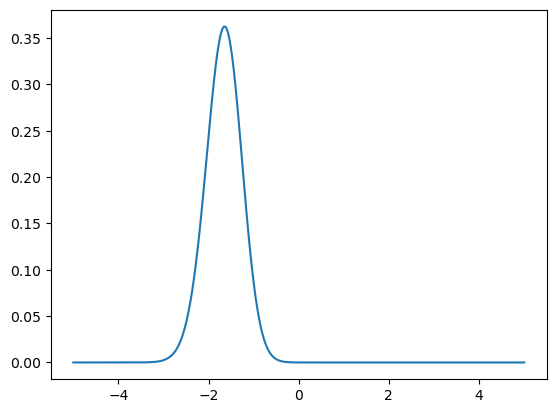

In [105]:
plt.plot(lams,LGM0)

In [106]:
generate_joint_PDF=True

if generate_joint_PDF:
    JPDF_meta=np.zeros((lamshape,alphashape))
    
    for i in range(lamshape):
        for j in range(alphashape):
            JPDF_meta[i,j]=LGM_likelihood_meta(lams[i],alphas[j])

   

In [114]:
pickle_it=True
import datetime
import pickle
if pickle_it:
    today=datetime.date.today().strftime("%m%d%Y")
    with open("PICKLED/LGM_JPDF_meta_"+today+".pkl","wb") as picklefile:
        pickle.dump(JPDF_meta,picklefile)

In [108]:
def normlam(X,x=lams):
    return X/np.trapz(X,x=x)

In [109]:
alphaprior=np.exp(-0.5*(alphas-0.1)**2/(0.1**2))*1/(np.sqrt(2*np.pi)*0.1)
justalpha=np.tile(alphaprior,len(lams)).reshape(len(lams),len(alphas))
alpha_gaussian_meta=normlam(np.sum(justalpha*JPDF_meta,axis=1))

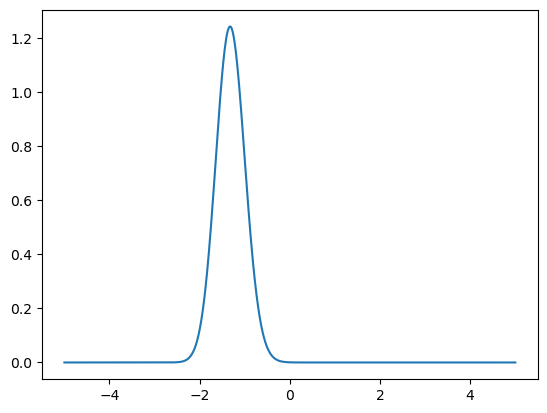

In [110]:
plt.plot(lams,alpha_gaussian_meta)